<a href="https://colab.research.google.com/github/sensiboi/Backtesting-a-Candelstick-Based-Trading-Strategy-in-the-Indian-Stock-Market/blob/main/Candelstick_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Backtesting a Candelstick Based Trading Strategy in the Indian Stock Market**

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

Download Data

In [2]:
data = yf.download("RELIANCE.NS", start="2019-01-01", end="2024-12-31")
data = data.dropna()

/tmp/ipython-input-2556293260.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("RELIANCE.NS", start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Candelstick Pattern Logic

In [3]:
data['Bullish_Engulfing'] = (
    (data['Close'] > data['Open']) &
    (data['Close'].shift(1) < data['Open'].shift(1)) &
    (data['Close'] > data['Open'].shift(1)) &
    (data['Open'] < data['Close'].shift(1))
)
data['Bearish_Engulfing'] = (
    (data['Close'] < data['Open']) &
    (data['Close'].shift(1) > data['Open'].shift(1)) &
    (data['Open'] > data['Close'].shift(1)) &
    (data['Close'] < data['Open'].shift(1))
)

Trading Signals

In [4]:
data['Signal'] = 0
data.loc[data['Bullish_Engulfing'], 'Signal'] = 1
data.loc[data['Bearish_Engulfing'], 'Signal'] = -1

Strategy Returns/ Backtesting Logic

In [5]:
data['Market_Return'] = data['Close'].pct_change()
data['Strategy_Return'] = data['Signal'].shift(1) * data['Market_Return']
data = data.dropna()

Performence Evaluation

In [6]:
total_return = (data['Strategy_Return'] + 1).prod() - 1
win_rate = (data['Strategy_Return'] > 0).sum() / len(data[data['Signal'] != 0])
print("Total Strategy Return:", round(total_return*100,2), "%")
print("Win Rate:", round(win_rate*100,2), "%")

Total Strategy Return: -18.99 %
Win Rate: 42.74 %


## **Business Metrics Calculation**

1. Cumulative Return

In [7]:
cumulative_return = (1 + data['Strategy_Return']).prod() - 1
cumulative_return

np.float64(-0.18993250882622814)

Compunded Annual Growth Rate [CAGR] (Annualized)

In [8]:
years = (data.index[-1] - data.index[0]).days / 365
cagr = (1 + cumulative_return) ** (1 / years) - 1
cagr

np.float64(-0.03451269225261566)

Annualized Volatility

In [9]:
volatility = data['Strategy_Return'].std() * np.sqrt(252)
volatility

np.float64(0.08273386141900459)

Sharpe Ratio

In [10]:
risk_free_rate = 0.06  # 6% (India context)
sharpe_ratio = (cagr - risk_free_rate) / volatility
sharpe_ratio

np.float64(-1.1423701327556481)

Maximum Drawdown

In [12]:
cum_returns = (1 + data['Strategy_Return']).cumprod()
rolling_max = cum_returns.cummax()
drawdown = (cum_returns - rolling_max) / rolling_max
max_drawdown = drawdown.min()
max_drawdown

-0.22979803145639865

Profit Factor

In [15]:
trades = data[data['Signal'] == 0]
gross_profit = trades[trades['Strategy_Return'] > 0]['Strategy_Return'].sum()
gross_loss = abs(trades[trades['Strategy_Return'] < 0]['Strategy_Return'].sum())
profit_factor = gross_profit / gross_loss
profit_factor

np.float64(0.7930259526533439)

Average Gain & Loss

In [17]:
avg_gain = trades[trades['Strategy_Return'] > 0]['Strategy_Return'].mean()
avg_loss = trades[trades['Strategy_Return'] < 0]['Strategy_Return'].mean()
print("Average Gain:", avg_gain)
print("Average Loss:", avg_loss)

Average Gain: 0.013351998114923222
Average Loss: -0.012755131220131319


Expectancy (per trade value)

In [19]:
expectancy = (win_rate * avg_gain) + ((1 - win_rate) * avg_loss)
expectancy

np.float64(-0.012755131220131319)

Market Exposure

In [20]:
exposure = (data['Signal'] != 0).mean()
exposure

np.float64(0.07910750507099391)

Business Summary

In [21]:
print("----- Strategy Performance Summary -----")
print(f"Cumulative Return: {cumulative_return:.2%}")
print(f"CAGR: {cagr:.2%}")
print(f"Annual Volatility: {volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Win Rate: {win_rate:.2%}")
print(f"Profit Factor: {profit_factor:.2f}")
print(f"Expectancy per Trade: {expectancy:.4f}")
print(f"Market Exposure: {exposure:.2%}")

----- Strategy Performance Summary -----
Cumulative Return: -18.99%
CAGR: -3.45%
Annual Volatility: 8.27%
Sharpe Ratio: -1.14
Maximum Drawdown: -22.98%
Win Rate: 0.00%
Profit Factor: 0.79
Expectancy per Trade: -0.0128
Market Exposure: 7.91%


Visualization

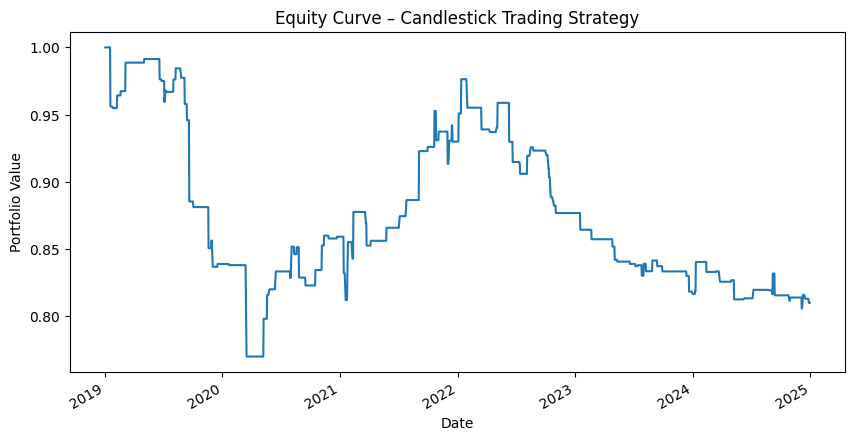

In [22]:
cum_returns.plot(figsize=(10,5))
plt.title("Equity Curve – Candlestick Trading Strategy")
plt.ylabel("Portfolio Value")
plt.show()